In [10]:
from funciones import *

# Trabajo Práctico 1
## Análisis Matemático III

### Integrantes:
- Dehan Josefina
- Vulcano Facundo
- Hofkamp Nataly

### Punto 1. [cambiar, es del chat]
 Nos dimos cuenta de que cumplen las propiedades de Dirichlet debido a la presencia de discontinuidades finitas, así como otras características relevantes. Para ilustrar este aspecto, presentamos gráficos que demuestran que trabajamos en intervalos específicos:

  - Señal diente de sierra en el intervalo [0, 2].
  - Señal de pulso en el intervalo [0, 2π].
  - (Se incluirá próximamente un gráfico de la señal triangular).
  
Estos gráficos resaltan las características esenciales de las señales analizadas y respaldan nuestra observación de que cumplen las propiedades de Dirichlet.


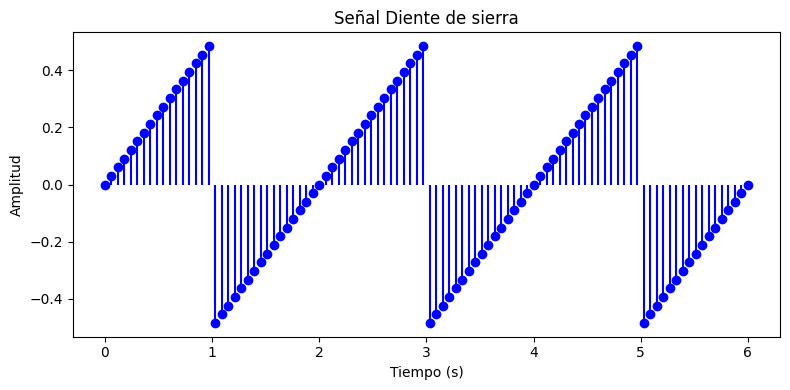

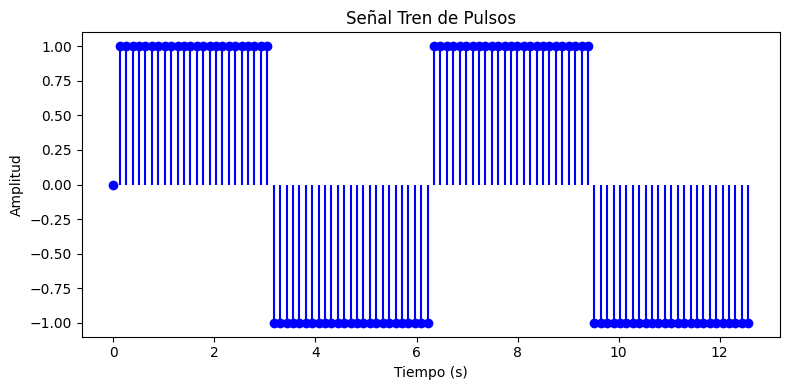

In [11]:
A = 1.0      
T = (2*np.pi)   
tren_pulsos, muestras_tren,series_tren= create_signal_serie(A,T,4*np.pi ,100,tren_de_pulsos,serie_tren_de_pulsos)
diente_sierra, muestras_diente,series_diente = create_signal_serie(A,2,6,100,diente_de_sierra,serie_diente_de_sierra)
plot(muestras_diente, diente_sierra, 'Señal Diente de sierra', 'Tiempo (s)', 'Amplitud', 'Diente de sierra')
plot(muestras_tren, tren_pulsos,'Señal Tren de Pulsos', 'Tiempo (s)', 'Amplitud', 'Tren de Pulsos')

### Punto 2: Cálculo de Series de Fourier [Chat Gpt-es solo para tener una idea de lo que hay que poner-]
**Introducción**

Las Series de Fourier son un conjunto de técnicas matemáticas que permiten descomponer una función periódica en una suma de funciones sinusoidales (senos y cosenos) o exponenciales complejas. Esto es útil en el análisis de señales periódicas en diversas aplicaciones, como la teoría de la señal, la electrónica, la física y la ingeniería.

**Cálculo de Series de Fourier**

El cálculo de una Serie de Fourier para una función periódica \(f(t)\) en un intervalo \(T\) implica los siguientes pasos generales:

1. Determinar el período fundamental de la función \(T\), que es el menor valor positivo de \(T\) para el cual \(f(t + T) = f(t)\) para todos los \(t\).

2. Calcular los coeficientes de Fourier, que dependen del tipo de función y se utilizan para ponderar las componentes sinusoidales o exponenciales en la serie.

3. Escribir la Serie de Fourier en función de los coeficientes y las funciones base (senos y cosenos o exponenciales complejas).

**Cálculo de las Series Específicas**

Vamos a calcular las Series de Fourier para tres tipos de señales específicas:

1. **Tren de Pulsos**
[hay que aclarar si es par o impar, entre qué intervalos integramos, por qué y donde encontrar las cuentas en el latex]

   La ecuación para un tren de pulsos periódico en el intervalo \([0, T]\) es:

   \[f(t) = \sum_{n=0}^{\infty} a_n \cdot p(t - nT)\]

   Donde \(p(t)\) es la función pulso rectangular y \(a_n\) son los coeficientes de Fourier del pulso.

2. **Señal Diente de Sierra**
[hay que aclarar si es par o impar, entre qué intervalos integramos, por qué y donde encontrar las cuentas en el latex]

   La ecuación para una señal diente de sierra periódica en el intervalo \([0, T]\) es:

   \[f(t) = \sum_{n=1}^{\infty} b_n \cdot \sin\left(\frac{2\pi n t}{T}\right)\]

   Donde \(b_n\) son los coeficientes de Fourier de la señal diente de sierra.

3. **Señal Triangular**
[hay que aclarar si es par o impar, entre qué intervalos integramos, por qué y donde encontrar las cuentas en el latex]
   La ecuación para una señal triangular periódica en el intervalo \([0, T]\) es:

   \[f(t) = \sum_{n=1}^{\infty} c_n \cdot \cos\left(\frac{2\pi n t}{T}\right)\]

   Donde \(c_n\) son los coeficientes de Fourier de la señal triangular.

El cálculo específico de los coeficientes \(a_n\), \(b_n\), y \(c_n\) varía según la función y puede requerir integración o análisis matemático detallado. Sin embargo, una vez que se conocen estos coeficientes, se pueden utilizar para escribir la Serie de Fourier completa para la función periódica.

En resumen, el cálculo de una Serie de Fourier implica determinar los coeficientes apropiados y utilizarlos para descomponer una función periódica en componentes sinusoidales o exponenciales. Estas series son fundamentales en el análisis de señales y sistemas periódicos.


## Punto 3. 

Creamos  funciones que reciben el el Periodo y la amplitud de las señales y la cantidad de armónicos utilizar.

[solo copio el codigo para que lo vean]

In [12]:

def serie_diente_de_sierra(A,T, muestras, cant_armonicos):
    serie = []
    for t in muestras:
        armonicos = 0
        for n in range(1, cant_armonicos+1):
            w = (2*np.pi/T)
            a = (4*A/(T**2))
            alpha = w*n*T/2
            b = (T/(2*w*n))
            armonicos += (a*((b*(-np.cos(alpha)))+(np.sin(alpha)/((w*n)**2))) * np.sin(w*n*t))
        serie.append(armonicos)
    return serie

def serie_tren_de_pulsos(A,T, muestras, cant_armonicos):
    serie = []
    w= (2*np.pi/T)
    for t in muestras:
        armonicos = 0
        for n in range(1, cant_armonicos + 1):
            armonicos += ((4*A/(T*n*w))*(1-np.cos(n*w*T/2)) * np.sin(n *w * t))
        serie.append(armonicos)
    return serie

#falta agregar la de la triangular

## Punto 4 [use correccionesd e Chat gpt- igual habría que completar mas, se puede hablar de cada señal en particular]
A continuación, se presentan los gráficos para cada señal. Se observa que a mayor cantidad de armónicos, nuestra serie se acerca más a la señal original, ya que las ondulaciones son menores y puede simular una línea en algunos intervalos, por lo general, cuanto más alejados estén de los puntos de discontinuidad. Se evidencian picos en los puntos de discontinuidad, pero a su vez se observa una reducción en ellos a medida que aumentan los armónicos

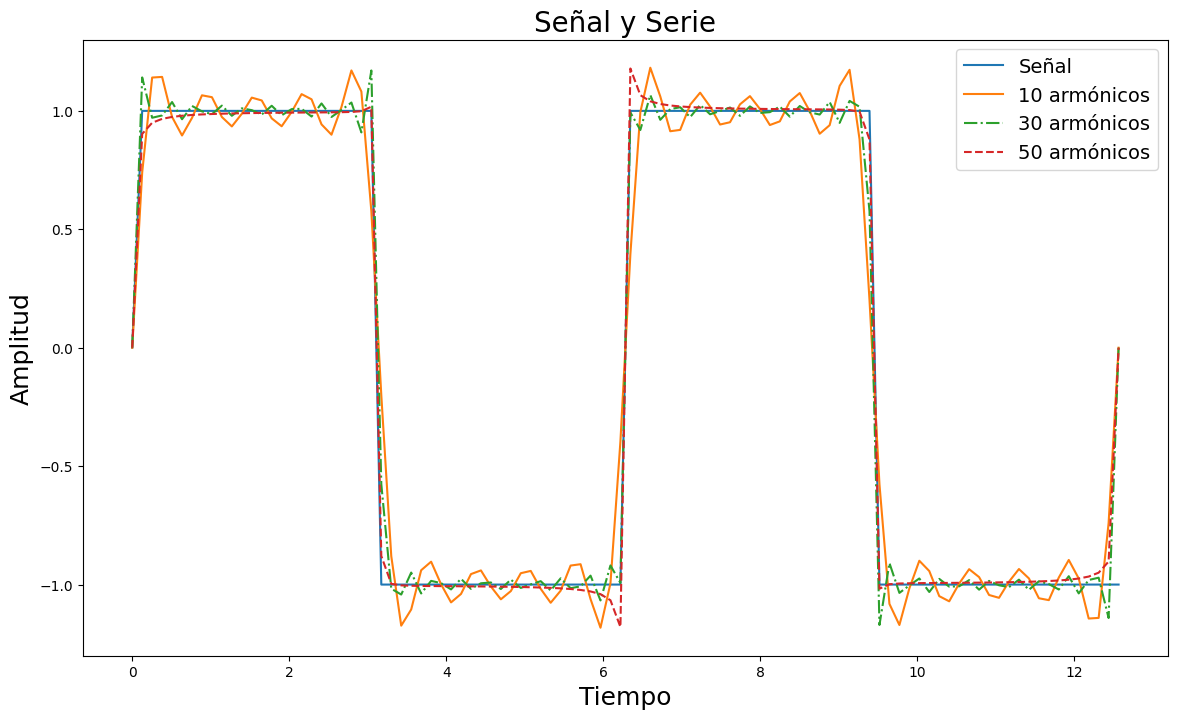

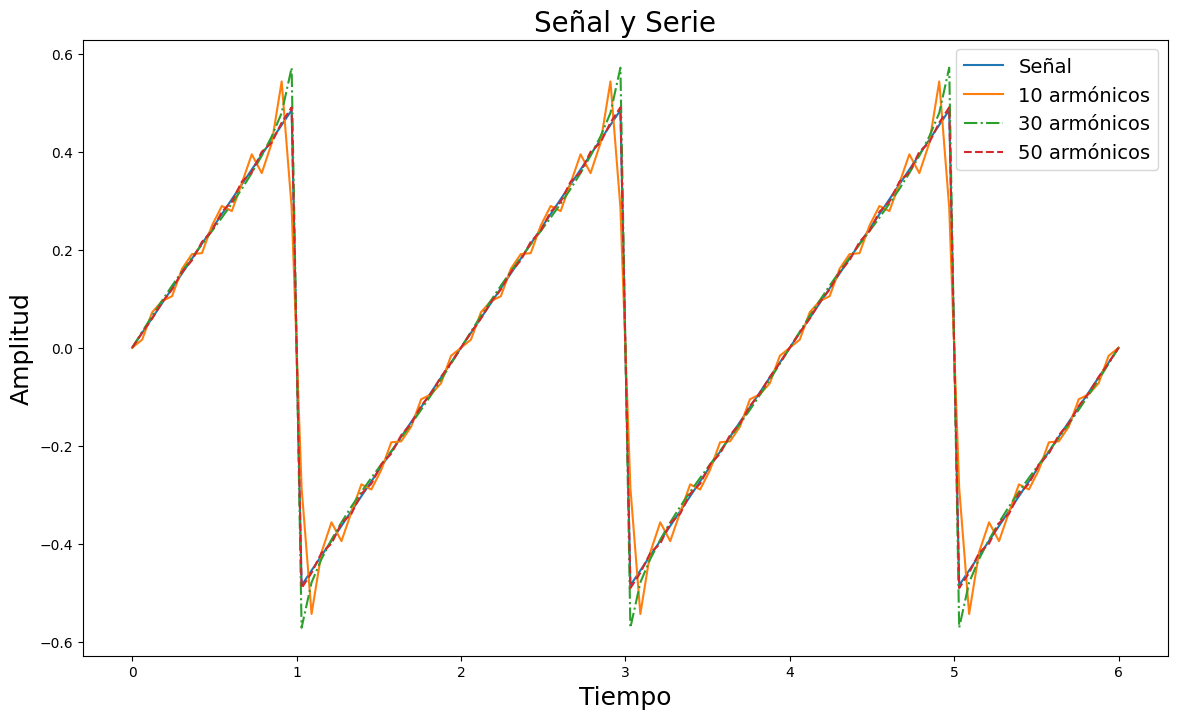

In [13]:
graphs(muestras_tren,tren_pulsos,series_tren)
graphs(muestras_diente,diente_sierra,series_diente)


## Punto 5. fenómeno de Gibbs.
Al realizar las pruebas del fenómeno de gibbs en los puntos de discontinuidad de cada función observamos los siguientes resultados 

[idea rta chat gpt, obviamente cambiar y completar] A medida que aumentas la cantidad de armónicos en la serie, las amplitudes de Gibbs disminuyen, lo cual es un comportamiento esperado. Este comportamiento es una propiedad del fenómeno de Gibbs y se refleja en la disminución de la magnitud de las oscilaciones en los puntos de discontinuidad a medida que se consideran más armónicos.

En resumen, los resultados que estás obteniendo son consistentes con el fenómeno de Gibbs y muestran cómo las oscilaciones cerca de los puntos de discontinuidad disminuyen a medida que se incluyen más componentes armónicos en la serie.

[me parece interesanre notar que cada vez en mas chico el errorr de manera visible porque hay cada vez más ceros por delante, ni idea si es relevante]


1. **Señal Trem de Pulsos**  (cambiar los números por las coordenadas)
    [fijarse por qué hay uno que da cero, no debe ser un  punto discontinuo]

| Punto de Discontinuidad | Cantidad de Armónicos | Amplitud de Gibbs |
|-------------------------|------------------------|--------------------|
| 1                       | 10                     | 0.0                |
| 2                       | 10                     | 0.42335897565353786|
| 3                       | 10                     | 0.6048057577969704 |
| 4                       | 10                     | 0.7990953907247784 |
| 1                       | 30                     | 0.0                |
| 2                       | 30                     | 0.17059444378796496|
| 3                       | 30                     | 0.006839890036924756|
| 4                       | 30                     | 0.4236065922642799 |
| 1                       | 50                     | 0.0                |
| 2                       | 50                     | 0.017473927832714953|
| 3                       | 50                     | 0.17901169427515629|
| 4                       | 50                     | 0.12090421850611177|



2. **Señal Diente de Sierra**  (cambiar los números por las coordenadas)

| Punto de Discontinuidad | Cantidad de Armónicos | Amplitud de Gibbs |
|------------------------|-----------------------|-------------------|
| 1                      | 10                    | 0.0888007995456066|
| 2                      | 10                    | 0.19892398375832038|
| 3                      | 10                    | 0.08880079954560627|
| 4                      | 10                    | 0.19892398375831966|
| 5                      | 10                    | 0.08880079954560594|
| 6                      | 10                    | 0.19892398375831905|
| 1                      | 30                    | 0.024509599346801136|
| 2                      | 30                    | 0.0865245616602166|
| 3                      | 30                    | 0.024509599346800526|
| 4                      | 30                    | 0.08652456166021705|
| 5                      | 30                    | 0.02450959934680008|
| 6                      | 30                    | 0.08652456166021771|
| 1                      | 50                    | 0.004757972412938405|
| 2                      | 50                    | 0.005596544483390975|
| 3                      | 50                    | 0.00475797241293846|
| 4                      | 50                    | 0.005596544483389754|
| 5                      | 50                    | 0.00475797241293785|
| 6                      | 50                    | 0.005596544483390087|

3. **Señal Triangular**
[correr el código en funciones y pedirle a chat gpt que haga la tabla para markdown de estos datos]



## Punto 6. Error cuadrático medio

[completar con el codigo de jose y agregar igual que en el anterior tablas con los resultados, se ven mas bonitos]
[agregar un análisis de cómo los errores fueron disminuyendo]


## Punto 7. 
Habría que copiar la función que recibe el error cuadrático y con eso crea la señal. Hacer los mismos gráficos que antes [la series con distintas cantidades de armónicos sobre la señal] y explicar que para legar a ese error se necesitaron x armónicos.

| Señal               | Error Esperado | ECM       | Cantidad de Armónicos |
|---------------------|----------------|-----------|------------------------|
| Tren de Pulsos      | 0.5            | 0.1877    | 1                      |
| Diente de Sierra    | 0.5            | 0.1321    | 1                      |
| Tren de Pulsos      | 0.1            | 0.0986    | 3                      |
| Diente de Sierra    | 0.1            | 0.1311    | 500                    |
| Tren de Pulsos      | 0.01           | 0.0100    | 500                    |
| Diente de Sierra    | 0.01           | 0.1311    | 500                    |


## Punto 8.

hacer un gráfico del ECM en función de la cantidad de armónicos. 